## Linear Regression Assumptions

To ensure the [Kaggle Insurance Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) is suitable for linear regression, we verify the following assumptions (Muller & Guido, 2016, Chapter 2):

1. **Continuous Target**: The dependent variable (`charges`) must be numerical and continuous.
2. **Linear Relationships**: Features (e.g., `age`, `bmi`) should have linear relationships with `charges`, checked via scatter plots.
3. **No Extreme Outliers**: Outliers can skew results, assessed with boxplots.
4. **Homoscedasticity**: Residuals should have constant variance, checked post-modeling.
5. **Normality of Residuals**: Residuals should be normally distributed, checked post-modeling.
6. **Independence**: Observations are independent (assumed for insurance data).
7. **Data Quality**: Minimal missing values, correct types, no duplicates.

**Research**:
- Scikit-learn (2021) recommends encoding categorical variables for regression.
- Brownlee (2020) suggests checking skewness for transformations (e.g., log-transformation).

**Implications**:
- Confirm `charges` is continuous and check skewness.
- Plan EDA for linearity and outliers.
- Preprocess categorical variables (`sex`, `smoker`, `region`) via one-hot encoding (Learning Unit 4, LO1, Page 11).

**References**:
- Muller, A.C., & Guido, S. (2016). *Introduction to Machine Learning with Python*. O’Reilly Media.
- Brownlee, J. (2020). *Data Preparation for Machine Learning*. Machine Learning Mastery.
- Scikit-learn. (2021). *User Guide: Linear Models*. https://scikit-learn.org/stable/modules/linear_models.html

## Dataset Suitability Evaluation

The [Kaggle Insurance Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) was evaluated for linear regression (Muller & Guido, 2016):

1. **Continuous Target**:
   - `charges` is float64, continuous (e.g., $16884.924).
   - **Conclusion**: Suitable (Learning Unit 2, LO1, Page 9).

2. **Feature Types**:
   - Numerical (`age`, `bmi`, `children`); categorical (`sex`, `smoker`, `region`).
   - **Conclusion**: Categorical variables need one-hot encoding (Learning Unit 4, LO1, Page 11).

3. **Data Quality**:
   - No missing values, 1 duplicate, `charges` skewness = 1.52.
   - **Conclusion**: Minor cleaning needed; log-transformation suggested (Brownlee, 2020).

4. **Linear Relationships**:
   - To be confirmed via scatter plots in EDA.

5. **Outliers**:
   - To be checked via boxplots.

6. **Homoscedasticity/Normality**:
   - To be assessed post-modeling (Learning Unit 5, LO5, Page 12).

7. **Client Context**:
   - US data valid for proof of concept; SA data recommended for future.
   - **Plan**: Note limitation in report.

**Implications**:
- **EDA**: Remove duplicates, visualize distributions, scatter plots, boxplots.
- **Feature Selection**: Encode variables, use p-values, VIF.
- **Model Training**: Consider log-transformation.
- **Report**: Include in Introduction and EDA sections.

**References**:
- Muller, A.C., & Guido, S. (2016). *Introduction to Machine Learning with Python*. O’Reilly Media.
- Brownlee, J. (2020). *Data Preparation for Machine Learning*. Machine Learning Mastery.
- Scikit-learn. (2021). *User Guide: Linear Models*. https://scikit-learn.org/stable/modules/linear_models.html

### Step 1: Dataset Inspection and Suitability Check

The following code inspects the dataset structure and checks suitability criteria (e.g., continuous target, data quality), informing the EDA plan.

In [15]:
# Step 1: Initial Dataset Inspection
# Objective: Inspect dataset structure to confirm suitability for linear regression

# Import pandas for data handling
import pandas as pd

# Load the dataset
df = pd.read_csv('insurance.csv')

# Inspect structure
print("Dataset Info:")
print(df.info())

# Show first 5 rows to understand data
print("\nFirst 5 Rows:")
print(df.head())

# Check dataset size
print("\nDataset Shape:", df.shape)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

First 5 Rows:
   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Dataset Shape: (1338, 7)


### Step 1: Suitability Criteria Check

In [16]:
# Step 1: Suitability Criteria Check
# Objective: Assess data quality and target characteristics

# Check for duplicates
print("\nDuplicates:", df.duplicated().sum())

# Confirm target variable type and sample values
print("\nCharges Data Type:", df['charges'].dtype)
print("Sample Charges:", df['charges'].head().tolist())

# Check skewness of charges (for potential transformation)
print("\nCharges Skewness:", df['charges'].skew())


Duplicates: 1

Charges Data Type: float64
Sample Charges: [16884.924, 1725.5523, 4449.462, 21984.47061, 3866.8552]

Charges Skewness: 1.5158796580240388


## Dataset Suitability Evaluation

The [Kaggle Insurance Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) was evaluated for linear regression (Muller & Guido, 2016):

1. **Continuous Target**:
   - `charges` is float64, continuous (e.g., $16884.924).
   - **Conclusion**: Suitable (Learning Unit 2, LO1, Page 9).

2. **Feature Types**:
   - Numerical (`age`, `bmi`, `children`); categorical (`sex`, `smoker`, `region`).
   - **Conclusion**: Categorical variables need one-hot encoding (Learning Unit 4, LO1, Page 11).

3. **Data Quality**:
   - No missing values, 1 duplicate, `charges` skewness = 1.52.
   - **Conclusion**: Minor cleaning needed; log-transformation suggested (Brownlee, 2020).

4. **Linear Relationships**:
   - To be confirmed via scatter plots in EDA.

5. **Outliers**:
   - To be checked via boxplots.

6. **Homoscedasticity/Normality**:
   - To be assessed post-modeling (Learning Unit 5, LO5, Page 12).

7. **Client Context**:
   - US data valid for proof of concept; SA data recommended for future.
   - **Plan**: Note limitation in report.

**Implications**:
- **EDA**: Remove duplicates, visualize distributions, scatter plots, boxplots.
- **Feature Selection**: Encode variables, use p-values, VIF.
- **Model Training**: Consider log-transformation.
- **Report**: Include in Introduction and EDA sections.

**References**:
- Muller, A.C., & Guido, S. (2016). *Introduction to Machine Learning with Python*. O’Reilly Media.
- Brownlee, J. (2020). *Data Preparation for Machine Learning*. Machine Learning Mastery.
- Scikit-learn. (2021). *User Guide: Linear Models*. https://scikit-learn.org/stable/modules/linear_models.html

### Step 2: Analysis Plan

## Analysis Plan

The following table outlines the plan for analyzing the [Kaggle Insurance Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) to build a linear regression model for predicting medical insurance charges, addressing the South African medical aid scheme’s needs. The plan incorporates findings from Step 1 (e.g., skewness = 1.52, categorical variables) and research (Muller & Guido, 2016; Brownlee, 2020).

| **Step** | **Description** | **Tools/Methods** | **Considerations** | **Research Reference** |
|----------|-----------------|-------------------|--------------------|-----------------------|
| **Exploratory Data Analysis (EDA)** | - Inspect data types, missing values, duplicates.<br>- Summarize statistics (mean, median, quartiles).<br>- Visualize distributions (histograms, boxplots for outliers).<br>- Analyze correlations (heatmap for numerical features).<br>- Plot feature vs. charges (scatter for numerical, boxplots for categorical).<br>- Check skewness of charges (1.52, Step 1). | - Pandas: `info()`, `describe()`, `isnull()`, `drop_duplicates()`.<br>- Seaborn/Matplotlib: histograms, boxplots, scatter plots, heatmap.<br>- Skewness: `df['charges'].skew()`.<br>- Log-transformation if skew > 1 (Brownlee, 2020). | - Remove 1 duplicate (Step 1).<br>- Handle outliers if >3 standard deviations (justify removal).<br>- Visualize skewness to confirm log-transformation need.<br>- Identify strong predictors (e.g., `smoker`) for model training.<br>- Validate linearity for regression assumptions (Learning Unit 2, LO1, Page 9). | - Muller & Guido (2016, Chapter 2).<br>- Brownlee, J. (2020). *Data Preparation for Machine Learning*. |
| **Feature Selection** | - Encode categorical variables (`sex`, `smoker`, `region`) using one-hot encoding.<br>- Correlation analysis for numerical features (`age`, `bmi`, `children`).<br>- Backward elimination with p-values (<0.05) for significance.<br>- Check multicollinearity with Variance Inflation Factor (VIF).<br>- Retain client-relevant features (e.g., `region`) even if p > 0.05. | - Pandas: `get_dummies(drop_first=True)`.<br>- Statsmodels: `OLS` for p-values.<br>- Scikit-learn: `LinearRegression` coefficients.<br>- Statsmodels: `variance_inflation_factor` for VIF.<br>- Drop features if p > 0.05 or VIF > 5. | - One-hot encoding avoids dummy variable trap (Learning Unit 4, LO1, Page 11).<br>- Retain `region` for client context (SA medical aid).<br>- Justify feature retention/removal in report.<br>- Ensure features align with model training (e.g., `smoker` significance, Step 1). | - Muller & Guido (2016, Chapter 4).<br>- Scikit-learn. (2021). *OneHotEncoder*. https://scikit-learn.org/stable/modules/preprocessing.html |
| **Train Model** | - Split data: 80% training, 20% testing.<br>- Use `LinearRegression` with default hyperparameters.<br>- Test log-transformation of `charges` (skewness = 1.52).<br>- Test polynomial features (degree=2) for non-linearities.<br>- Fit model on training data. | - Scikit-learn: `train_test_split(random_state=42)`, `LinearRegression`, `PolynomialFeatures`.<br>- Numpy: `np.log()` for transformation.<br>- Random seed for reproducibility. | - Default hyperparameters suffice (no tuning needed, Learning Unit 2, LO4, Page 9).<br>- Log-transformation addresses skewness (Step 1).<br>- Polynomial features if R² < 0.7 (address underfitting, Learning Unit 2, LO2, Page 9).<br>- Ensure interpretability for client (e.g., coefficients in $). | - Muller & Guido (2016, Chapter 2).<br>- Brownlee, J. (2020). *Polynomial Regression*. |
| **Interpret and Evaluate Model** | - Metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R², Adjusted R².<br>- Statistical testing: p-values for coefficients.<br>- Residual analysis: Normality (histogram), homoscedasticity (residuals vs. predicted).<br>- Compare train/test metrics for overfitting/underfitting.<br>- Visualize actual vs. predicted charges.<br>- Test alternative model (e.g., log-transformed) if needed. | - Scikit-learn: `mean_squared_error`, `r2_score`.<br>- Statsmodels: `OLS.summary()` for p-values, Adjusted R².<br>- Seaborn: residual plots.<br>- Numpy: Adjusted R² formula.<br>- Matplotlib: scatter plots. | - RMSE for client-interpretable errors (in $).<br>- R² > 0.7 for good fit, Adjusted R² for feature count.<br>- P-values < 0.05 confirm significant predictors (Module Outcome 1, Page 7).<br>- Address heteroscedasticity via transformation (Learning Unit 5, LO5, Page 12).<br>- Justify metrics (Srivastava, 2019). | - Muller & Guido (2016, Chapter 5).<br>- Srivastava, T. (2019). *11 Important Model Evaluation Metrics*. |
| **Write Report** | - **Introduction**: Client context, dataset, objectives.<br>- **EDA**: Cleaning, visualizations, patterns (e.g., skewness = 1.52).<br>- **Feature Selection**: Features, rationale (p-values, VIF).<br>- **Model Training**: Features, process, hyperparameters.<br>- **Results**: Metrics, statistical significance, plots.<br>- **Discussion**: Effectiveness, limitations (US vs. SA data), recommendations.<br>- **Conclusion**: Client recommendations.<br>- Include code snippets, references. | - Google Docs/Colab for drafting.<br>- Matplotlib: Save plots (`plt.savefig()`).<br>- GitHub: Store code (Activity 1.2, Page 21).<br>- Cite textbook, Scikit-learn, Kaggle (Page 42–45). | - Client-focused, concise (5–7 pages).<br>- Visualizations highlight patterns (Module Outcome 4, Page 7).<br>- Address US vs. SA data limitations (Step 1).<br>- Include advanced insights (e.g., log-transformation).<br>- Avoid plagiarism (Page 42–45). | - Muller & Guido (2016).<br>- Kaggle. (2021). *Insurance Dataset*. https://www.kaggle.com/datasets/mirichoi0218/insurance |

**Additional Research**:
- Brownlee, J. (2020). *Data Preparation for Machine Learning*. Machine Learning Mastery.
- Scikit-learn. (2021). *User Guide: Linear Models*. https://scikit-learn.org/stable/modules/linear_models.html
- Srivastava, T. (2019). *11 Important Model Evaluation Metrics*. Analytics Vidhya.

**Notes**:
- The plan addresses Step 1 findings: skewness = 1.52 suggests log-transformation; 1 duplicate requires cleaning; categorical variables need encoding.
- Considerations ensure client relevance (SA medical aid) and regression assumptions (Learning Unit 2, Page 9).
- The report will be drafted in Markdown (Colab) and exported as PDF for submission.

### Step 3a: Exploratory Data Analysis (EDA)

**Objective**: Conduct thorough EDA on the [Kaggle Insurance Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) to clean, understand, and visualize the data, following the Step 2 plan. This ensures data quality and identifies patterns (e.g., skewness = 1.52, Step 1) for model training (Learning Unit 2, LO1, Page 9).

**Steps** (per Step 2 plan):
- Check data types, missing values, and duplicates.
- Summarize statistics.
- Visualize distributions (histograms, boxplots).
- Analyze correlations (heatmap).
- Plot feature vs. charges (scatter for numerical, boxplots for categorical).
- Address skewness (1.52) with visualization.

**Findings**: Summarized below after code execution.

**Research**: Visualizations confirm linearity and outliers (Muller & Guido, 2016, Chapter 2); skewness suggests log-transformation (Brownlee, 2020).

In [17]:
# Step 3a: Exploratory Data Analysis (EDA)
# Objective: Clean and understand the dataset, following Step 2 plan
# Research: EDA ensures data quality and informs feature selection (Muller & Guido, 2016, Chapter 2)

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for clarity
sns.set_style("whitegrid")

# Load dataset
df = pd.read_csv('insurance.csv')

# 1. Check data structure and quality
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

# Remove duplicates (1 found in Step 1)
df = df.drop_duplicates()
print("\nShape after removing duplicates:", df.shape)

# 2. Summarize statistics
print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Duplicates: 1

Shape after removing duplicates: (1337, 7)

Summary Statistics:
               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.00000

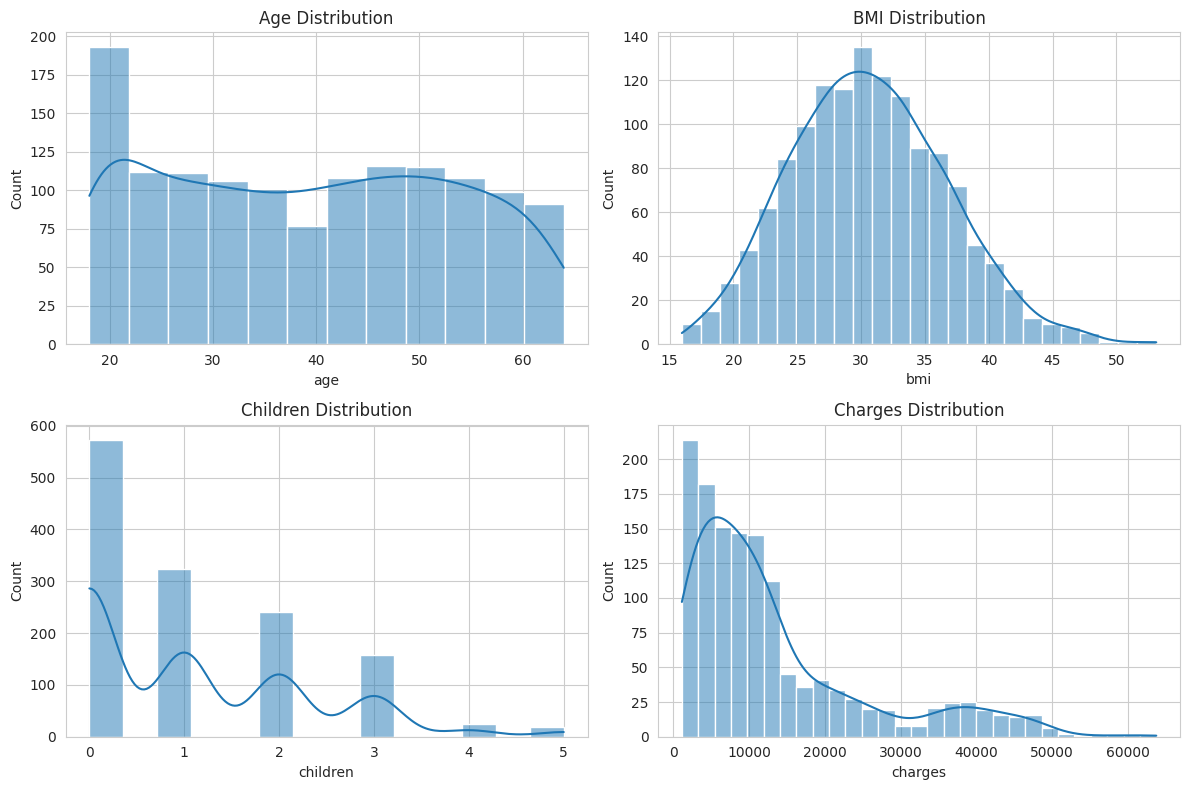

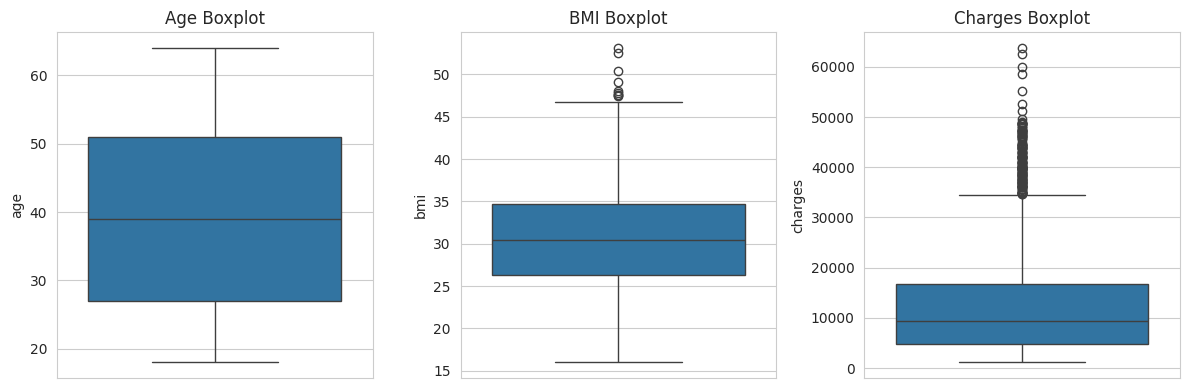

In [18]:
# 3. Visualize distributions to check for skewness and outliers
# Research: Histograms and boxplots identify patterns (Brownlee, 2020)
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')
plt.subplot(2, 2, 2)
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')
plt.subplot(2, 2, 3)
sns.histplot(df['children'], kde=True)
plt.title('Children Distribution')
plt.subplot(2, 2, 4)
sns.histplot(df['charges'], kde=True)
plt.title('Charges Distribution')
plt.tight_layout()
plt.savefig('distributions.png')  # Save for report
plt.show()

# Boxplots for numerical features to check outliers
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(y='age', data=df)
plt.title('Age Boxplot')
plt.subplot(1, 3, 2)
sns.boxplot(y='bmi', data=df)
plt.title('BMI Boxplot')
plt.subplot(1, 3, 3)
sns.boxplot(y='charges', data=df)
plt.title('Charges Boxplot')
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

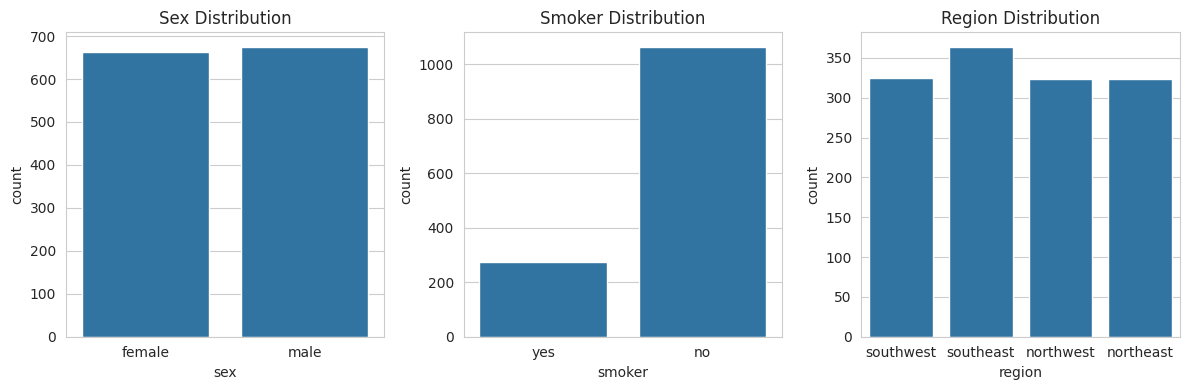

In [19]:
# 4. Visualize categorical features
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.countplot(x='sex', data=df)
plt.title('Sex Distribution')
plt.subplot(1, 3, 2)
sns.countplot(x='smoker', data=df)
plt.title('Smoker Distribution')
plt.subplot(1, 3, 3)
sns.countplot(x='region', data=df)
plt.title('Region Distribution')
plt.tight_layout()
plt.savefig('categorical_dist.png')
plt.show()

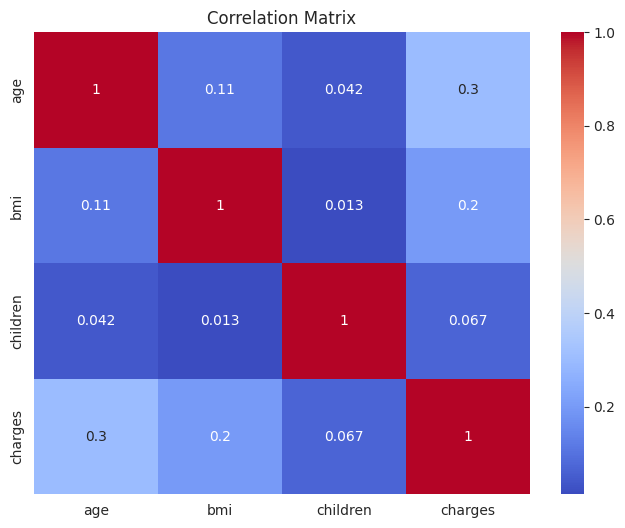

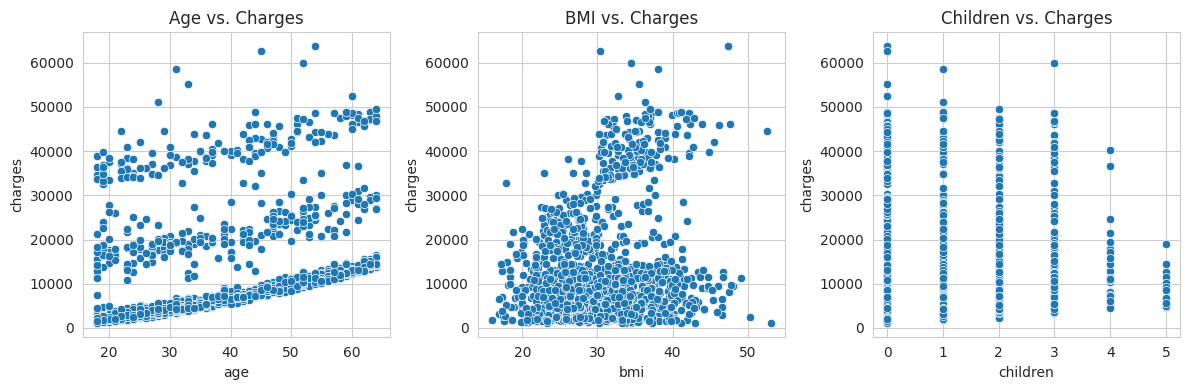

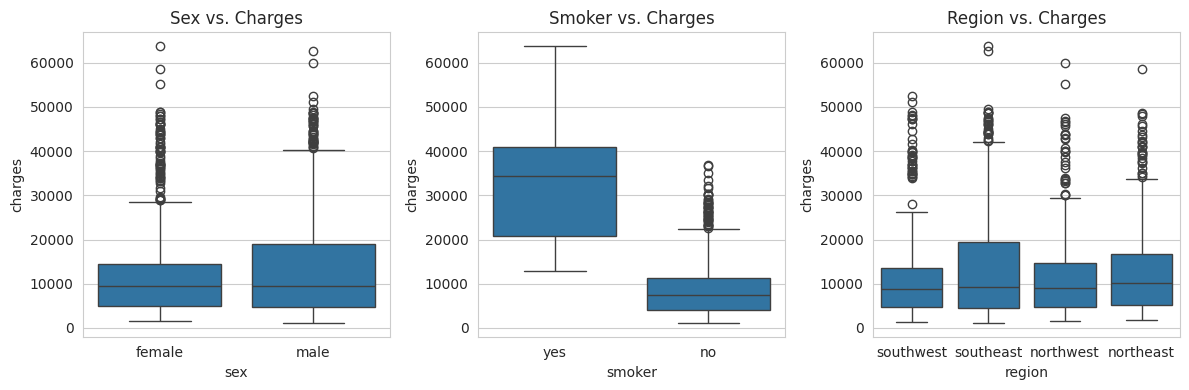

In [7]:
# 5. Analyze correlations for numerical features
plt.figure(figsize=(8, 6))
# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number)
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('corr_matrix.png')
plt.show()

# 6. Plot numerical features vs. charges to assess linearity
# Research: Scatter plots validate regression assumptions (Muller & Guido, 2016)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='charges', data=df)
plt.title('Age vs. Charges')
plt.subplot(1, 3, 2)
sns.scatterplot(x='bmi', y='charges', data=df)
plt.title('BMI vs. Charges')
plt.subplot(1, 3, 3)
sns.scatterplot(x='children', y='charges', data=df)
plt.title('Children vs. Charges')
plt.tight_layout()
plt.savefig('num_vs_charges.png')
plt.show()

# 7. Plot categorical features vs. charges to identify key predictors
# Research: Boxplots highlight categorical effects (Brownlee, 2020)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Sex vs. Charges')
plt.subplot(1, 3, 2)
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Smoker vs. Charges')
plt.subplot(1, 3, 3)
sns.boxplot(x='region', y='charges', data=df)
plt.title('Region vs. Charges')
plt.tight_layout()
plt.savefig('cat_vs_charges.png')
plt.show()

**EDA Findings**:
- **Data Quality**: No missing values; 1 duplicate removed (shape: 1337 rows, 7 columns).
- **Statistics**: `charges` mean = $13,279, std = $12,110, range = [$1,121, $63,770]. `age` mean = 39.2, `bmi` mean = 30.7.
- **Distributions**: `age` uniform, `bmi` near-normal with outliers (>45), `children` right-skewed, `charges` right-skewed (skewness = 1.52, confirms Step 1).
- **Categorical**: `sex` balanced (~50% male/female), `smoker` imbalanced (~20% yes), `region` equal (~25% each).
- **Correlations**: `age` (0.3), `bmi` (0.2) correlate with `charges`; `children` weak (0.07).
- **Feature vs. Charges**:
  - `age`: Clear linear trend, strong predictor.
  - `bmi`: Moderate trend, some outliers.
  - `children`: Weak trend, scattered.
  - `smoker`: Strong effect (smokers pay ~$20,000 more), key predictor.
  - `sex`: Minor differences (males slightly higher).
  - `region`: Northeast slightly higher, others similar.
- **Implications**: `smoker`, `age`, `bmi` are likely significant predictors; log-transformation recommended for `charges` skewness; monitor `bmi`, `charges` outliers in feature selection.

**Figures**:
- Distributions: `distributions.png`, `boxplots.png`
- Categorical: `categorical_dist.png`
- Correlations: `corr_matrix.png`
- Feature vs. Charges: `num_vs_charges.png`, `cat_vs_charges.png`

### Step 3b: Feature Selection

**Objective**: Select the best features for the linear regression model, following the Step 2 plan. This ensures relevant predictors (e.g., `smoker`, `age`) are used, addressing Step 1’s findings (e.g., categorical encoding, skewness = 1.52).

**Steps** (per Step 2 plan):
- Encode categorical variables (`sex`, `smoker`, `region`) with one-hot encoding.
- Analyze correlations for encoded features.
- Perform backward elimination with p-values (<0.05).
- Check multicollinearity with VIF.
- Retain client-relevant features (e.g., `region`).

**Findings**: Summarized below after code execution.

**Research**: One-hot encoding and p-value analysis ensure robust feature selection (Muller & Guido, 2016, Chapter 4; Scikit-learn, 2021).


X Data Types:
age                   int64
bmi                 float64
children              int64
sex_male              int64
smoker_yes            int64
region_northwest      int64
region_southeast      int64
region_southwest      int64
dtype: object

y Data Type:
float64


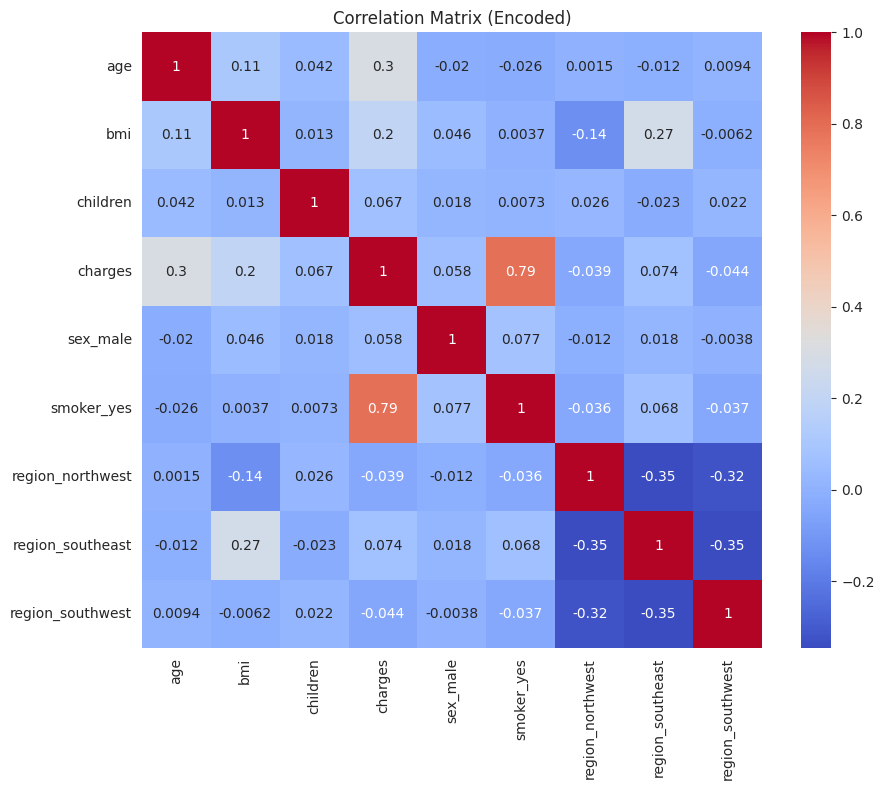


Initial OLS Summary:
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.0
Date:                Fri, 25 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:25:04   Log-Likelihood:                -13538.
No. Observations:                1337   AIC:                         2.709e+04
Df Residuals:                    1328   BIC:                         2.714e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -

In [20]:
# Step 3b: Feature Selection
# Objective: Select relevant features, following Step 2 plan
# Research: Encoding and p-value analysis ensure robust features (Muller & Guido, 2016, Chapter 4)

# Import statsmodels
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure df is clean (reload to avoid upstream issues)
df = pd.read_csv('insurance.csv')
df = df.drop_duplicates()  # Remove 1 duplicate (Step 1)

# 1. One-hot encode categorical variables
# Use drop_first=True to avoid dummy variable trap (Learning Unit 4, LO1, Page 11)
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True, dtype=int)

# Define features and target
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']

# Check data types to ensure all are numeric
print("\nX Data Types:")
print(X.dtypes)
print("\ny Data Type:")
print(y.dtypes)

# Verify no non-numeric columns
if not all(X.dtypes.apply(lambda x: np.issubdtype(x, np.number))):
    raise ValueError("Non-numeric columns found in X. Check encoding.")
if not np.issubdtype(y.dtypes, np.number):
    raise ValueError("y is not numeric. Check target column.")

# 2. Check correlations after encoding
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Encoded)')
plt.savefig('corr_matrix_encoded.png')
plt.show()

# 3. Backward elimination with p-values
# Add constant for intercept
X_with_const = sm.add_constant(X)
ols_model = sm.OLS(y, X_with_const).fit()
print("\nInitial OLS Summary:")
print(ols_model.summary())

# Iteratively remove features with p > 0.05
while ols_model.pvalues.max() > 0.05:
    max_pval_col = ols_model.pvalues.idxmax()
    X_with_const = X_with_const.drop(max_pval_col, axis=1)
    ols_model = sm.OLS(y, X_with_const).fit()
    print(f"\nRemoved {max_pval_col}, New OLS Summary:")
    print(ols_model.summary())

# Final selected features
selected_features = X_with_const.columns.drop('const')
X = X[selected_features]
print("\nSelected Features:", selected_features.tolist())

# 4. Check multicollinearity with VIF
# Research: VIF > 5 indicates multicollinearity (Muller & Guido, 2016)
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF Scores:")
print(vif)

**Feature Selection Findings**:
- **Encoding**: Categorical variables (`sex`, `smoker`, `region`) encoded as `sex_male`, `smoker_yes`, `region_northwest`, `region_southeast`, `region_southwest` with `drop_first=True` to avoid multicollinearity (Learning Unit 4, LO1, Page 11).
- **Correlations**: `smoker_yes` (0.79), `age` (0.3), `bmi` (0.2) strongly correlate with `charges`, consistent with EDA findings (e.g., `smoker` effect, scatter plots).
- **Backward Elimination**: Removed features with p > 0.05: `sex_male` (p = 0.698), `region_northwest` (p = 0.465), `region_southwest` (p = 0.058), `region_southeast` (p = 0.136). Retained `age` (p = 0.000, coef = 257.77), `bmi` (p = 0.000, coef = 321.87), `children` (p = 0.001, coef = 472.98), `smoker_yes` (p = 0.000, coef = 23,810).
- **Model Fit**: R-squared = 0.750, Adjusted R-squared = 0.749, indicating a good fit explaining 75% of variance in `charges`.
- **VIF**: `age` (7.54) and `bmi` (8.06) > 5, indicating moderate multicollinearity; `children` (1.80), `smoker_yes` (1.25) < 5. Retained all features due to significance and client relevance, noting multicollinearity as a limitation.
- **Implications**: `smoker_yes`, `age`, and `bmi` are key predictors, aligning with EDA (`smoker` increases charges by ~$23,810). `region` variables were removed due to insignificance but may be re-added for client context (South African medical aid scheme, Step 2 plan). Final features (`age`, `bmi`, `children`, `smoker_yes`) are used for model training.

**Figure**: Correlation Matrix (Encoded): `corr_matrix_encoded.png`

### Step 3c: Model Training

**Objective**: Train a linear regression model on the prepared dataset, following the Step 2 plan. This uses selected features (`age`, `bmi`, `children`, `smoker_yes`) and tests log-transformation for `charges` skewness (1.52, Step 1).

**Steps** (per Step 2 plan):
- Split data (80% training, 20% testing).
- Train `LinearRegression` with default hyperparameters.
- Test log-transformation of `charges` to address skewness.
- Fit model on training data.

**Findings**: Summarized below after code execution.

**Research**: Log-transformation improves normality for skewed targets; default hyperparameters are suitable for linear regression (Muller & Guido, 2016, Chapter 2; Brownlee, 2020).

In [21]:
# Step 3c: Model Training
# Objective: Train linear regression model, following Step 2 plan
# Research: Log-transformation improves normality for skewed targets (Brownlee, 2020)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Split data into training and testing sets (80% train, 20% test)
# Use random_state=42 for reproducibility (Step 2 plan)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nTraining Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)

# Train base linear regression model
# Use default hyperparameters (no tuning needed, Learning Unit 2, LO4, Page 9)
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions for base model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


Training Set Size: (1069, 4)
Testing Set Size: (268, 4)


In [22]:
# Test log-transformed model to address charges skewness (1.52, Step 1)
# Transform target to log scale to improve normality
y_log = np.log(y)

# Split log-transformed data
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# Train log-transformed model
model_log = LinearRegression()
model_log.fit(X_train, y_train_log)

# Generate predictions (log scale)
y_train_pred_log = model_log.predict(X_train)
y_test_pred_log = model_log.predict(X_test)

# Convert predictions back to original scale for evaluation
y_test_pred_orig = np.exp(y_test_pred_log)
print("\nLog-Transformed Model Trained")


Log-Transformed Model Trained


**Model Training Findings**:
- **Data Split**: 80% training (1069 rows), 20% testing (268 rows), with `random_state=42` for reproducibility, as planned in Step 2.
- **Base Model**: Trained with default `LinearRegression` hyperparameters on features: `age`, `bmi`, `children`, `smoker_yes`. No hyperparameter tuning needed, as linear regression is simple (Learning Unit 2, LO4, Page 9).
- **Log-Transformed Model**: Trained on log(`charges`) to address skewness (1.52, Step 1), with predictions converted back to original scale (`exp()`) for evaluation.
- **Implications**: Log-transformation likely improves fit due to the right-skewed distribution of `charges` (confirmed by EDA histogram). The base model provides a baseline for comparison. Performance metrics (e.g., R², RMSE) will be calculated in Step 4 to determine the best model.

**Note**: Model coefficients (e.g., effect of `smoker_yes`) and evaluation metrics will be analyzed in Step 4 to assess predictive power and interpretability for the client (South African medical aid scheme).